In [1]:
import sys, os
sys.path.append("../")

# Init simulation

In [2]:
from braidpy.simu import simu


sim = simu( max_iter = 1000,  
            stim = "monde",  
            langue = "fr",  
            path = "../",  
            lexicon_name = "lexique3_red.csv",  
            conf_mat_name = "Simpson13Mod.xls",  
            ortho_char_name = "alphabet_lat.csv",
            phono_char_name = "xsampa_fr.csv",
            enable_phono = True, 
            store_phono = True, 
            store_ortho = True,
            model = None,  
            use_pkl = False,  
            save_pkl = False,
            build_prototype = False
            )
model = sim.model

# Specify Model Parameters

In [3]:
# Paramètres
stimulus = "monde"
model.gazePosition = (len(stimulus)+1)/2 
model.meanA = (len(stimulus)+1)/2
model.sdA = 1.75
model.Qa = 1
model.top_down_influence = False

# Specify output to store

In [4]:
sim.store={"percept":True, "word":True, "ld":True, "TDI":True, "wsim_mask":False}

# Run simulation

In [5]:
sim.run_simu_normal()

SIMU:root:stimulus monde
SIMU:root:Simulation duration: 1000
SIMU:root:ld ortho : 0.9752
SIMU:root:percept ortho : monde [0.096, 0.156, 0.682, 0.677, 0.683]
SIMU:root:word ortho :  monde, /m&d/, wmax = 0.9872 
SIMU:root:ld phono : 0.5
SIMU:root:percept phono : m&d [0.447, 0.793, 0.878, 0.862, 0.713, 0.22]
SIMU:root:word phono :  monde, /m&d/, wmax = 0.9872 
SIMU:root:forme phono générée : /m&d###/
SIMU:root:fixation positions : [3.0]
SIMU:root:fixation VA dispersion : [1.75]


In [6]:
os.getcwd()
import numpy as np

In [7]:
assert np.array_equal(np.array(sim.model.ortho.conf_mat), np.load("struct/monde_conf_mat.npy"))

In [8]:
assert np.array_equal(sim.model.ortho.build_trace(), np.load("struct/monde_input_mat.npy"))

In [9]:
assert np.array_equal(sim.model.ortho.interference_mat, np.load("struct/monde_interference_mat.npy"))

In [10]:
x1 = np.load("struct/monde_data_percept.npy")
assert np.array_equal(sim.res["ortho"]["percept"]["monde"], x1)

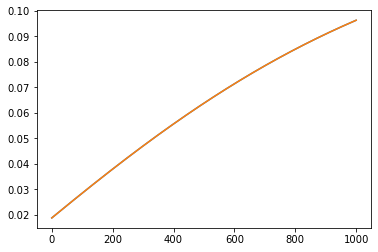

In [11]:
import matplotlib.pyplot as plt
import braidpy.braid_plot as brplt
plt.plot(np.arange(1001), x1[0,26,:].T)
plt.plot(np.arange(1001), sim.res["ortho"]["percept"]["monde"][0,26,:].T)

In [14]:
assert np.allclose(sim.res["ortho"]["word"]["monde"], np.load("struct/monde_data_word.npy"))

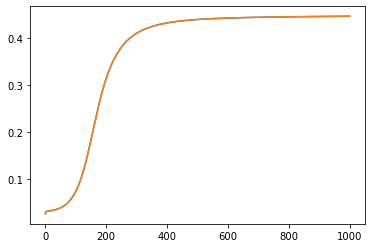

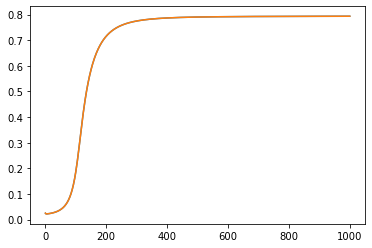

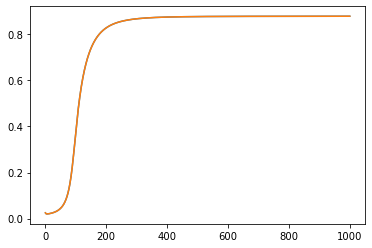

In [15]:
plt.plot(np.arange(1001), np.load("struct/monde_data_phon.npy")[0,12,:].T);
plt.plot(np.arange(1001), sim.res["phono"]["percept"]["monde"][0,12,:].T)

plt.figure()
plt.plot(np.arange(1001), np.load("struct/monde_data_phon.npy")[1,37,:].T);
plt.plot(np.arange(1001), sim.res["phono"]["percept"]["monde"][1,37,:].T)

plt.figure()
plt.plot(np.arange(1001), np.load("struct/monde_data_phon.npy")[2,3,:].T);
plt.plot(np.arange(1001), sim.res["phono"]["percept"]["monde"][2,3,:].T)

# Plots

In [16]:
#%%
import braidpy.braid_plot as brplt
import numpy as np

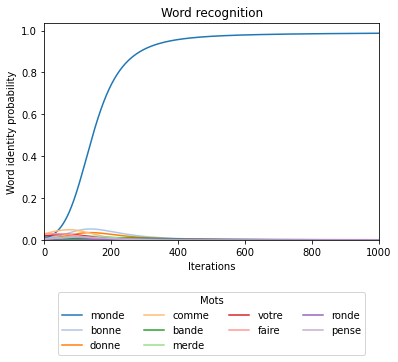

In [17]:
df = brplt.plot_word_distribution_evo(sim.model, sim.res["ortho"]["word"]["monde"], item_to_show = 10)

In [18]:
df = brplt.plot_letter_distribution_evo(sim.model, np.swapaxes(sim.res["ortho"]["percept"]["monde"], 0,1), pos2plot = -1);

ValueError: arrays must all be same length

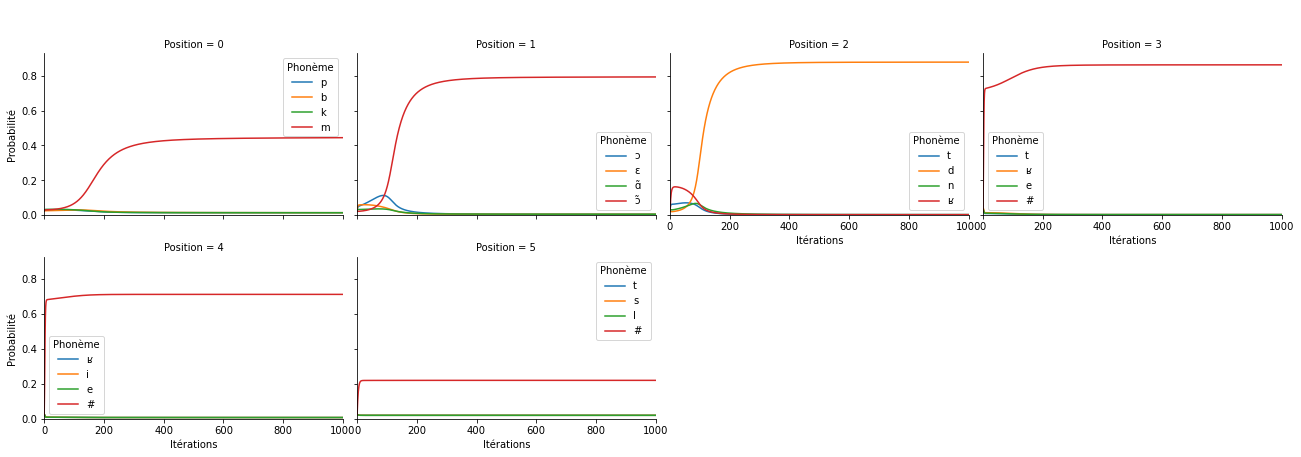

In [ ]:
brplt.plot_phoneme_distribution_evo(sim.model, np.swapaxes(sim.res["phono"]["percept"]["monde"], 0,1), pos2plot = -1);

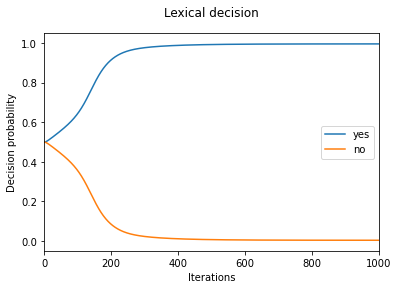

In [ ]:
brplt.plot_lexical_decision_evo(sim.model, sim.res["ortho"]["ld"]["monde"], stimulus="monde");